In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("heart_disease_data.csv")

# Data Exploration and Preproccessing

In [3]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
data.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<AxesSubplot:xlabel='Sex', ylabel='count'>

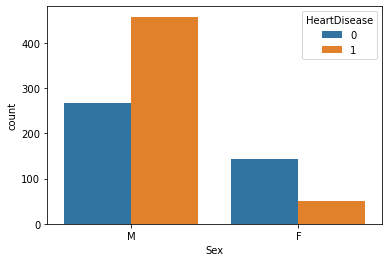

In [10]:
sns.countplot(data.Sex,hue=data.HeartDisease)

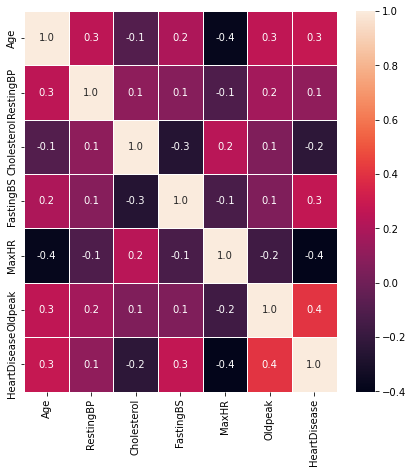

In [11]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Box_Plot

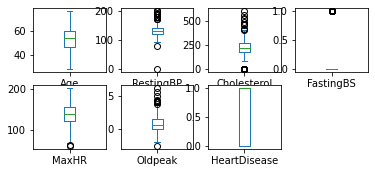

In [12]:
data.plot(kind="box", subplots= True, layout=(3,4), sharex= False)
plt.show()

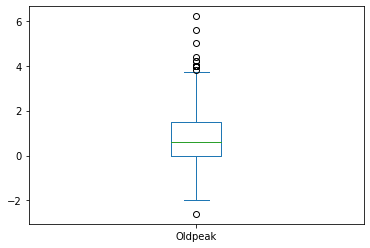

In [13]:
data.Oldpeak.plot(kind='box', subplots=True,sharex=False)
plt.show()

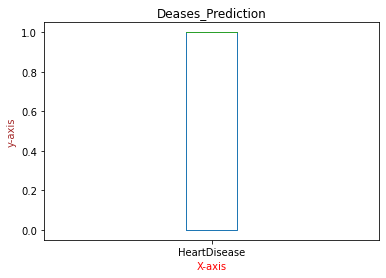

In [14]:
data.HeartDisease.plot(kind='box', subplots=True,sharex=False)

plt.title("Deases_Prediction",color="Black")
plt.xlabel("X-axis",color= "red" )
plt.ylabel("y-axis", color= "brown")
plt.show()

# Hist_plot

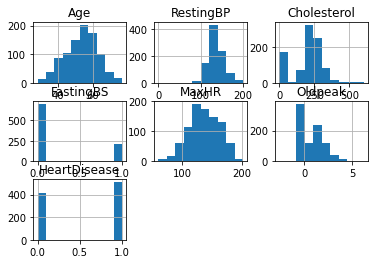

In [15]:
data.hist()
plt.show()

# Joint _Plot

In [16]:
X=data.drop(['HeartDisease'],axis=1)
Y=data['HeartDisease']

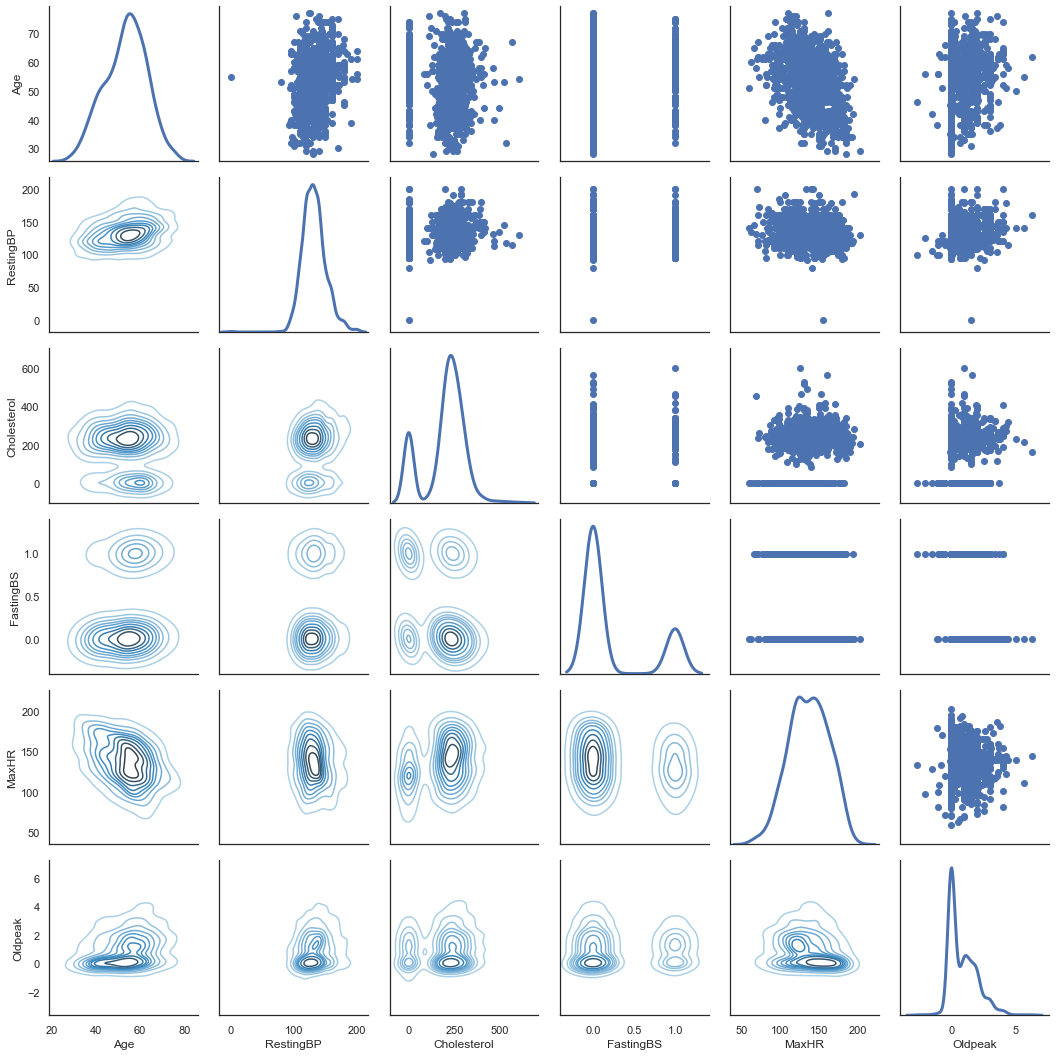

In [17]:
sns.set(style="white")
df = X.loc[:,['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);


# independent_Fearure

In [18]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


# Dependent_Feature

In [19]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# Checking the data types of independent Feature/variables

In [20]:
X.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object

# Disply the Count of target variable

In [21]:
Y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Spleting the feature and target into  tranning and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [23]:
X_train.shape

(734, 11)

In [24]:
Y_train.shape

(734,)

In [25]:
x_test.shape

(184, 11)

In [26]:
y_test.shape

(184,)

# Making of funtion to classification report confusion matrix  of traning and test set of given models.

In [27]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
def accuracy_matrix(X_train,x_test,Y_train,y_test,Model):
    print("----------------**Classification Accuracy Metrics**-----------------------\n")
    pred_y_test = Model.predict(x_test)   
    pred_Y_train=Model.predict(X_train)
    print("Model:-",Model[-1])
    print("Test_Confusion_Metrics")
    plt.show(plot_confusion_matrix(Model,x_test,y_test))
    print("Test Accuracy:")
    print(classification_report(pred_y_test,y_test))
    print("Training_Confusion_Metrics")
    plt.show(plot_confusion_matrix(Model,X_train,Y_train))
    print("Training Accuracy:")
    print(classification_report(pred_Y_train,Y_train))
    print("--------------------------------------------------------------------------")

# making  list of categorical and ordinal categorical feature

In [28]:
categorical_features = ["Sex",'ChestPainType','ExerciseAngina','ST_Slope']
ordinal_categorical_feature=['RestingECG']

### Column Transformation

In [29]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((OneHotEncoder(sparse = False),categorical_features),
                               (OrdinalEncoder(),ordinal_categorical_feature),
                               remainder = 'passthrough')

# Logistic Regression Model
### With Pipeline

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
lr= LogisticRegression()
lr_pipe= make_pipeline(column_trans,lr)

In [31]:
lr_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('logisticregression', LogisticRegression())])

In [32]:
pred_lr= lr_pipe.predict(x_test)
pred_lr

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

### Checking Accuracy,Ploting Confusion Metrics For Train and Test Data

----------------**Classification Accuracy Metrics**-----------------------

Model:- LogisticRegression()
Test_Confusion_Metrics


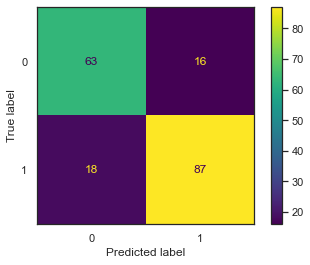

Test Accuracy:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        81
           1       0.83      0.84      0.84       103

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184

Training_Confusion_Metrics


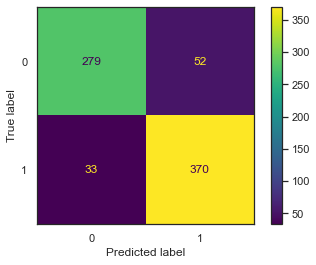

Training Accuracy:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       312
           1       0.92      0.88      0.90       422

    accuracy                           0.88       734
   macro avg       0.88      0.89      0.88       734
weighted avg       0.89      0.88      0.88       734

--------------------------------------------------------------------------


In [33]:
accuracy_matrix(X_train, x_test, Y_train, y_test,lr_pipe)

# KNeighborsClassifier Model
### With Pipeline

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(7)
knn_pipe= make_pipeline(column_trans,knn)
knn_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

----------------**Classification Accuracy Metrics**-----------------------

Model:- KNeighborsClassifier(n_neighbors=7)
Test_Confusion_Metrics


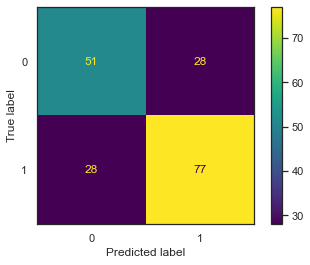

Test Accuracy:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        79
           1       0.73      0.73      0.73       105

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184

Training_Confusion_Metrics


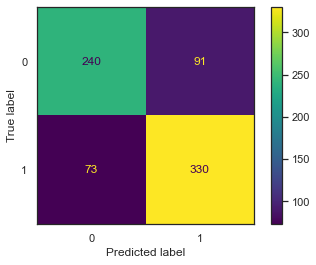

Training Accuracy:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       313
           1       0.82      0.78      0.80       421

    accuracy                           0.78       734
   macro avg       0.77      0.78      0.77       734
weighted avg       0.78      0.78      0.78       734

--------------------------------------------------------------------------


In [35]:
accuracy_matrix(X_train, x_test, Y_train, y_test,knn_pipe)

# Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='gini',
 max_depth=3,
 min_samples_leaf=150,
 min_samples_split=2)
dt_pipe= make_pipeline(column_trans,dt)
dt_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=150))])

----------------**Classification Accuracy Metrics**-----------------------

Model:- DecisionTreeClassifier(max_depth=3, min_samples_leaf=150)
Test_Confusion_Metrics


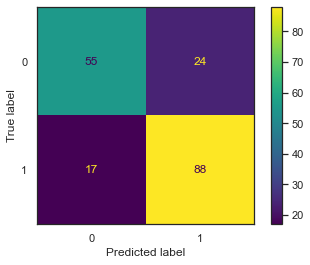

Test Accuracy:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        72
           1       0.84      0.79      0.81       112

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

Training_Confusion_Metrics


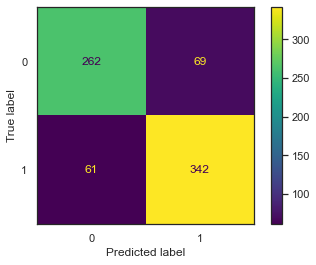

Training Accuracy:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       323
           1       0.85      0.83      0.84       411

    accuracy                           0.82       734
   macro avg       0.82      0.82      0.82       734
weighted avg       0.82      0.82      0.82       734

--------------------------------------------------------------------------


In [37]:
accuracy_matrix(X_train, x_test, Y_train, y_test,dt_pipe)

# Gaussian naive bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
ber_nb=GaussianNB()
ber_nb_pipe= make_pipeline(column_trans,ber_nb)
ber_nb_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('gaussiannb', GaussianNB())])

----------------**Classification Accuracy Metrics**-----------------------

Model:- GaussianNB()
Test_Confusion_Metrics


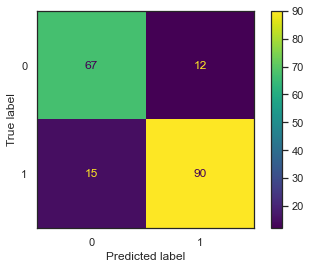

Test Accuracy:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.86      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Training_Confusion_Metrics


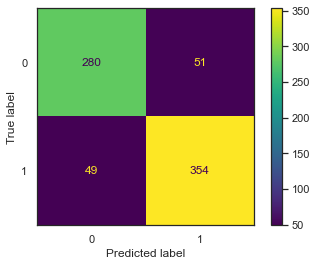

Training Accuracy:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.88      0.87      0.88       405

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

--------------------------------------------------------------------------


In [39]:
accuracy_matrix(X_train, x_test, Y_train, y_test,ber_nb_pipe)

# Support vectore Classifaire

In [40]:
from sklearn.svm import SVC
svm=SVC(kernel="rbf")
svm_pipe= make_pipeline(column_trans,svm)
svm_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('svc', SVC())])

----------------**Classification Accuracy Metrics**-----------------------

Model:- SVC()
Test_Confusion_Metrics


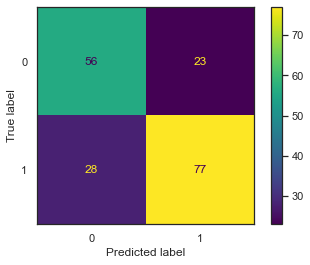

Test Accuracy:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        84
           1       0.73      0.77      0.75       100

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184

Training_Confusion_Metrics


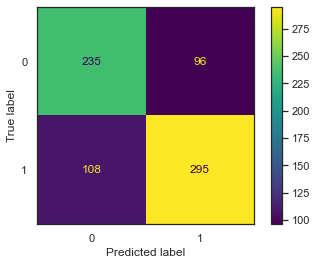

Training Accuracy:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       343
           1       0.73      0.75      0.74       391

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.72       734
weighted avg       0.72      0.72      0.72       734

--------------------------------------------------------------------------


In [41]:
accuracy_matrix(X_train, x_test, Y_train, y_test,svm_pipe)

# Enseble Learning Technique

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=5,n_estimators=200,max_leaf_nodes=7)
rfc_pipe= make_pipeline(column_trans,rfc)
rfc_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['RestingECG'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=7,
                                        n_estimators=200))])

----------------**Classification Accuracy Metrics**-----------------------

Model:- RandomForestClassifier(max_depth=5, max_leaf_nodes=7, n_estimators=200)
Test_Confusion_Metrics


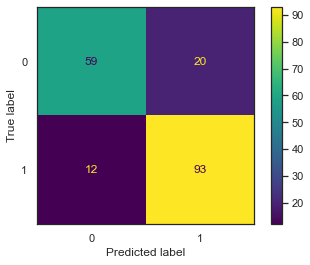

Test Accuracy:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        71
           1       0.89      0.82      0.85       113

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Training_Confusion_Metrics


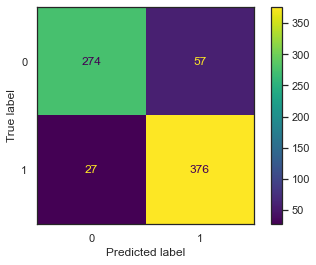

Training Accuracy:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       301
           1       0.93      0.87      0.90       433

    accuracy                           0.89       734
   macro avg       0.88      0.89      0.88       734
weighted avg       0.89      0.89      0.89       734

--------------------------------------------------------------------------


In [43]:
accuracy_matrix(X_train, x_test, Y_train, y_test,rfc_pipe)

# Xboost Classifier

In [44]:
from xgboost import XGBClassifier
bosting=XGBClassifier(learning_rate=0.9,max_depth=4,max_leaves= 2,n_estimators=150)
boosting_pipeline=make_pipeline(column_trans,bosting)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
boosting_pipeline.fit(X_train,Y_train)

In [ ]:
accuracy_matrix(X_train, x_test, Y_train, y_test,boosting_pipeline) # checking Accuracy and plotining Confusion Metrix for Randomforest classifier 

In [ ]:
# Above the XGBClassifier is Overfit Its need HyperParameter Tuning...etc

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
algorithm5= DecisionTreeClassifier(criterion='gini',
 max_depth=3,
 min_samples_leaf=150,
 min_samples_split=2)
algorithm4=SVC(kernel="rbf")
algorithm1 = GaussianNB()
algorithm2 = RandomForestClassifier(max_depth=5,n_estimators=200,max_leaf_nodes=7)
algorithm3 = LogisticRegression()
model_v = VotingClassifier(estimators = [('GaussianNB',algorithm1),('RandomForestClassifier',algorithm2),('Logistic Regression',algorithm3),('Support Vector',algorithm4),('DecisionTreeClassifier',algorithm5)],voting = 'hard',verbose = True)
pipe_v = make_pipeline(column_trans,model_v)
pipe_v.fit(X_train,Y_train)

In [ ]:
pred_v = pipe_v.predict(x_test)
pred_v

In [ ]:
accuracy_matrix(X_train, x_test, Y_train, y_test,pipe_v)

# Prediction of new data

In [ ]:
x=pd.DataFrame([[38,"M","NAP",150,280,0.0,"Normal",100,"Y",1.5,"Flat"]],columns=X.columns)

In [ ]:
pipe_v.predict(x)